# Import Libraries



In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import pairwise_distances

import matplotlib.pyplot as plt

# Load Dataset

In [17]:
df = pd.read_csv("dataset.csv")
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


# Separation of Metadata & Features

In [18]:
GENRE_COL = "track_genre"
DROP_COLS = [
    "Unnamed: 0",
    "track_id",
    "artists",
    "album_name",
    "track_name"
]
meta_df = df[DROP_COLS].copy()
X= df.drop(columns=DROP_COLS).copy()
X

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


# Definition of Numeric & Categorical Characteristics

In [19]:
numeric_cols = [c for c in X.columns if c != GENRE_COL]
categorical_cols = [GENRE_COL]

# One-Hot Encoding & Κανονικοποίηση

In [20]:


preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

X = preprocessor.fit_transform(X)

# K-Means for different k & SSE

In [21]:

Ks = [2, 3, 5, 7, 10, 15, 20]
sses = []

for k in Ks:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    km.fit(X)
    sses.append(km.inertia_)

# Plot for k with SSE

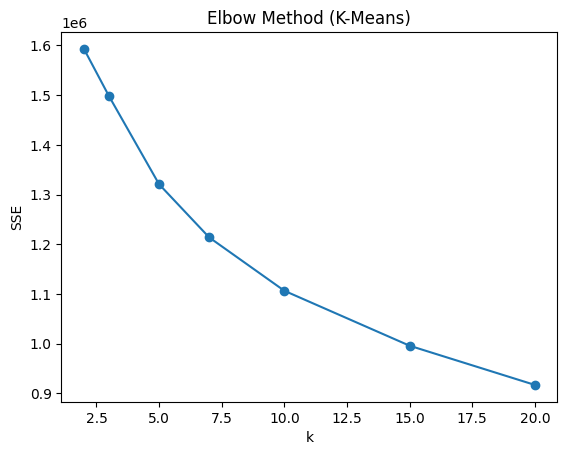

In [22]:

plt.plot(Ks, sses, marker="o")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Elbow Method (K-Means)")
plt.show()

# Selection of the best k according to the Elbow Method

In [13]:
best_k = 10

kmeans = KMeans(n_clusters=best_k, random_state=42, n_init="auto")
labels = kmeans.fit_predict(X)
df["cluster"] = labels
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,cluster
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,6
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,7
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,7
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,1
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,3
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,3
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,7
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,7


# Calculate the percentage of the dominant genre of the tracks for each cluster

In [14]:

dominant_genres = []

for c in sorted(df["cluster"].unique()):
    sub = df[df["cluster"] == c]
    counts = sub["track_genre"].value_counts()
    dominant_genres.append({
        "cluster": c,
        "dominant_genre": counts.idxmax(),
        "percentage": counts.max() / len(sub) * 100
    })

dominant_df = pd.DataFrame(dominant_genres)
dominant_df

,cluster,dominant_genre,percentage
0,0,pagode,7.117130
1,1,romance,4.728252
2,2,j-idol,2.000062
3,3,new-age,11.024318
4,4,comedy,80.339321
5,5,metalcore,8.434448
6,6,house,1.841588
7,7,honky-tonk,3.523901
8,8,sad,6.873575
9,9,minimal-techno,7.853261


# Bar chart showing glusters and the relative percentages of the dominant genres

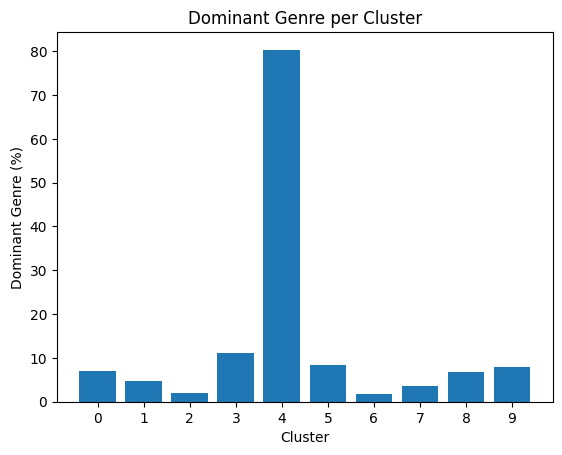

In [15]:
plt.bar(dominant_df["cluster"].astype(str), dominant_df["percentage"])
plt.xlabel("Cluster")
plt.ylabel("Dominant Genre (%)")
plt.title("Dominant Genre per Cluster")
plt.show()

# Function that takes a song as an argument and returns 3 suggested songs

In [16]:

def recommend(track_idx, metric, top_n=3):
    cluster_id = labels[track_idx]

    cluster_indices = np.where(labels == cluster_id)[0]
    X_cluster = X[cluster_indices]
    x_target = X[track_idx]

    dists = pairwise_distances(X_cluster, x_target, metric=metric).flatten()

    self_pos = np.where(cluster_indices == track_idx)[0][0]
    dists[self_pos] = np.inf

    best = np.argsort(dists)[:top_n]
    rec_indices = cluster_indices[best]

    return df.loc[rec_indices, ["track_name", "artists", "track_genre"]], cluster_id

# Recommendation with Euclidean Distance

In [29]:
track_idx = df[
    df["track_name"].str.contains("Pirates of the Caribbean Theme", case=False, na=False)
].index[0]

print("Selected track:")
print(df.loc[track_idx, ["track_name", "artists"]])

recs_euclid, cluster_id = recommend(track_idx, metric="euclidean")
recs_euclid

Selected track:
track_name    Pirates of the Caribbean Theme
artists                   Eddie van der Meer
Name: 726, dtype: object


,track_name,artists,track_genre
16407,Harry Potter (The Ultimate Indian Theme),Mahesh Raghvan,classical
105205,Dewdrop,Jobii,study
76122,"The Second Waltz, Op. 99a",André Rieu;Johann Strauss Orchestra,opera


Παρόλο που τα προτεινόμενα τραγούδια ανήκουν σε διαφορετικά genres, ταιριάζουν με το επιλεγμένο κομμάτι γιατί έχουν παρόμοιο ήχο. Αυτό δείχνει ότι το σύστημα συστάσεων δεν βασίζεται μόνο στο είδος της μουσικής, αλλά κυρίως στα ηχητικά χαρακτηριστικά, όπως ο ρυθμός, η ένταση και το αν το κομμάτι είναι ορχηστρικό.

# Recommendation with Cosine Distance

In [30]:
recs_cosine, _ = recommend(track_idx, metric="cosine")
recs_cosine

,track_name,artists,track_genre
16407,Harry Potter (The Ultimate Indian Theme),Mahesh Raghvan,classical
76122,"The Second Waltz, Op. 99a",André Rieu;Johann Strauss Orchestra,opera
105205,Dewdrop,Jobii,study


Τόσο η Ευκλείδεια όσο και η Cosine οδήγησαν στα ίδια προτεινόμενα μουσικά κομμάτια. Αυτό δείχνει ότι το cluster είναι καλά σχηματισμένο και περιλαμβάνει τραγούδια με ιδιαίτερα παρόμοια ηχητικά χαρακτηριστικά. Αυτό αποτελεί ένδειξη επιτυχούς ομαδοποίησης από τον αλγόριθμο K-Means.